In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
url = '/content/drive/MyDrive/Study Materials/Data Analytics/DS Project/merged_date_based_df.csv'
df = pd.read_csv(url)
df

,location,date,iso_code,continent,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,population,mobility_country_region,mobility_country_region_code,place_id,mobility_retail_and_recreation_percent_change_from_baseline,mobility_grocery_and_pharmacy_percent_change_from_baseline,mobility_parks_percent_change_from_baseline,mobility_transit_stations_percent_change_from_baseline,mobility_workplaces_percent_change_from_baseline,mobility_residential_percent_change_from_baseline
0,Afghanistan,2020-02-01,AFG,Asia,4.210220e+07,1.0,635814.944493,0.0,89748.736209,0.000828,...,41128772.0,Afghanistan,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,-1.200000,5.100000,0.866667,4.966667,2.600000,0.800000
1,Afghanistan,2020-03-01,AFG,Asia,8.310000e+02,113.0,504282.024942,4.0,0.651677,0.088677,...,41128772.0,Afghanistan,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,-10.741935,-1.306452,-3.306452,-9.064516,-7.161290,3.693548
2,Afghanistan,2020-04-01,AFG,Asia,2.335300e+04,1713.0,756.000000,56.0,18.926767,1.388400,...,41128772.0,Afghanistan,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,-50.250000,-32.233333,-29.000000,-46.183333,-40.566667,16.166667
3,Afghanistan,2020-05-01,AFG,Asia,2.044310e+05,12616.0,4616.000000,188.0,160.339000,9.895000,...,41128772.0,Afghanistan,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,-44.083333,-20.111111,-30.000000,-41.333333,-32.972222,16.416667
4,Afghanistan,2020-07-01,AFG,Asia,1.071563e+06,5304.0,32779.000000,538.0,840.446903,4.159968,...,41128772.0,Afghanistan,AF,ChIJbQL_-LZu0TgReNqWvg1GtfM,-8.827586,18.965517,-2.482759,-8.620690,-15.568966,6.379310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,Zimbabwe,2022-06-01,ZWE,Africa,7.630556e+06,3188.0,165839.000000,52.0,15584.771233,6.511233,...,16320539.0,Zimbabwe,ZW,ChIJYXGxBuekMRkR7r_LxV84wKE,81.072368,107.214912,112.265351,21.800439,94.280702,13.995614
4275,Zimbabwe,2022-07-01,ZWE,Africa,7.937590e+06,792.0,172561.000000,22.0,15688.899161,1.565452,...,16320539.0,Zimbabwe,ZW,ChIJYXGxBuekMRkR7r_LxV84wKE,85.623025,108.889391,115.711061,29.428894,98.004515,13.602709
4276,Zimbabwe,2022-08-01,ZWE,Africa,7.953408e+06,348.0,173222.000000,19.0,15720.163806,0.687839,...,16320539.0,Zimbabwe,ZW,ChIJYXGxBuekMRkR7r_LxV84wKE,84.663951,108.857434,118.362525,26.710794,80.421589,15.219959
4277,Zimbabwe,2022-09-01,ZWE,Africa,7.710880e+06,739.0,167925.000000,6.0,15748.826267,1.509333,...,16320539.0,Zimbabwe,ZW,ChIJYXGxBuekMRkR7r_LxV84wKE,89.407834,110.391705,118.714286,34.548387,101.642857,12.755760


In [5]:
df.columns

Index(['location', 'date', 'iso_code', 'continent', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'human_development_index', 'population', 'mobility_country_region',
       'mobility_country_region_code', 'place_id',
       'mobility_retail_and_recreation_percent_change_from_baseline',
       'mobility_grocery_and_pharmacy_percent_change_from_baseline',
       'mobility_parks_percent_change_from_baseline',
       'mobility_transit_stations_percent_change_from_baseline',
       'mobility_workplaces_percent_change_from_baseline',
       'mobility_residential_percent_change_from_baseline'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 31 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   location                                                     4279 non-null   object 
 1   date                                                         4279 non-null   object 
 2   iso_code                                                     4279 non-null   object 
 3   continent                                                    4279 non-null   object 
 4   total_cases                                                  4279 non-null   float64
 5   new_cases                                                    4279 non-null   float64
 6   total_deaths                                                 4279 non-null   float64
 7   new_deaths                                                   4279 non-null   f

In [10]:
df.isnull().sum()

location                                                       0
date                                                           0
iso_code                                                       0
continent                                                      0
total_cases                                                    0
new_cases                                                      0
total_deaths                                                   0
new_deaths                                                     0
total_cases_per_million                                        0
new_cases_per_million                                          0
total_deaths_per_million                                       0
new_deaths_per_million                                         0
population_density                                             0
median_age                                                     0
aged_65_older                                                  0
aged_70_older            

In [15]:
df["location"].value_counts()

Libya          33
Lebanon        33
Portugal       33
Poland         33
Philippines    33
               ..
Estonia        33
Georgia        32
Serbia         32
Afghanistan    32
Ukraine        25
Name: location, Length: 130, dtype: int64

In [53]:
#Linear Regression

# Assuming df is your DataFrame containing the relevant columns
dependent_variables = ['mobility_retail_and_recreation_percent_change_from_baseline',
                       'mobility_grocery_and_pharmacy_percent_change_from_baseline',
                       'mobility_parks_percent_change_from_baseline',
                       'mobility_transit_stations_percent_change_from_baseline',
                       'mobility_workplaces_percent_change_from_baseline',
                       'mobility_residential_percent_change_from_baseline'
                       ]

independent_variables = ['new_cases', 'new_deaths', 'gdp_per_capita', 'location']

# Select the relevant columns
data = df[dependent_variables + independent_variables].dropna()

# Separate categorical and numerical columns
categorical_columns = ['location']
numerical_columns = list(set(independent_variables) - set(categorical_columns))

# Preprocess categorical variables with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], data[dependent_variables], test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and train the multivariate linear regression model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 507.1429295181044
R-squared: 0.48612343023854104


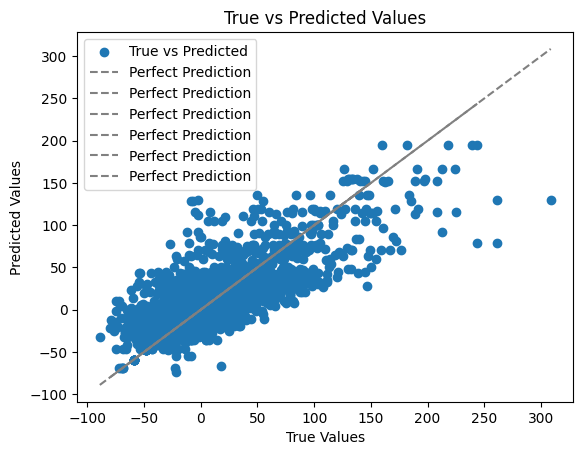

In [54]:
import matplotlib.pyplot as plt

true_values = y_test
predicted_values = predictions

# Plotting with different colors
plt.scatter(true_values, predicted_values, label='True vs Predicted')
plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], linestyle='--', color='gray', label='Perfect Prediction')

# Adding labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [55]:
#Random Forest Regression
# Assuming df is your DataFrame containing the relevant columns
dependent_variables = ['mobility_retail_and_recreation_percent_change_from_baseline',
                       'mobility_grocery_and_pharmacy_percent_change_from_baseline',
                       'mobility_parks_percent_change_from_baseline',
                       'mobility_transit_stations_percent_change_from_baseline',
                       'mobility_workplaces_percent_change_from_baseline',
                       'mobility_residential_percent_change_from_baseline']

independent_variables = ['new_cases', 'new_deaths', 'gdp_per_capita', 'location']

# Select the relevant columns
data = df[dependent_variables + independent_variables].dropna()

# Separate categorical and numerical columns
categorical_columns = ['location']
numerical_columns = list(set(independent_variables) - set(categorical_columns))

# Preprocess categorical variables with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], data[dependent_variables], test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Create and train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_preprocessed, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 433.3728423097727
R-squared: 0.5539447580909503


In [58]:
#K-nearest neighbors regression
# Assuming df is your DataFrame containing the relevant columns
dependent_variables = ['mobility_retail_and_recreation_percent_change_from_baseline',
                       'mobility_grocery_and_pharmacy_percent_change_from_baseline',
                       'mobility_parks_percent_change_from_baseline',
                       'mobility_transit_stations_percent_change_from_baseline',
                       'mobility_workplaces_percent_change_from_baseline',
                       'mobility_residential_percent_change_from_baseline']

independent_variables = ['new_cases', 'new_deaths', 'gdp_per_capita', 'location']

# Select the relevant columns
data = df[dependent_variables + independent_variables].dropna()

# Separate categorical and numerical columns
categorical_columns = ['location']
numerical_columns = list(set(independent_variables) - set(categorical_columns))

# Preprocess categorical variables with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], data[dependent_variables], test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Choose the number of neighbors (k)
k_neighbors = 5

# Create and train the KNN Regression model
model = KNeighborsRegressor(n_neighbors=k_neighbors)
model.fit(X_train_preprocessed, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test_preprocessed)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 498.2604495025778
R-squared: 0.4966339442611787


In [60]:
#decision tree regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming df is your DataFrame containing the relevant columns
dependent_variables = ['mobility_retail_and_recreation_percent_change_from_baseline',
                       'mobility_grocery_and_pharmacy_percent_change_from_baseline',
                       'mobility_parks_percent_change_from_baseline',
                       'mobility_transit_stations_percent_change_from_baseline',
                       'mobility_workplaces_percent_change_from_baseline',
                       'mobility_residential_percent_change_from_baseline']

independent_variables = ['new_cases', 'new_deaths', 'gdp_per_capita', 'location']

# Select the relevant columns
data = df[dependent_variables + independent_variables].dropna()

# Separate categorical and numerical columns
categorical_columns = ['location']
numerical_columns = list(set(independent_variables) - set(categorical_columns))

# Preprocess categorical variables with one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[independent_variables], data[dependent_variables], test_size=0.2, random_state=42)

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Convert sparse matrix to dense array
X_train_preprocessed_dense = X_train_preprocessed.toarray()
X_test_preprocessed_dense = X_test_preprocessed.toarray()

# Create and train the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_preprocessed_dense, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test_preprocessed_dense)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r_squared = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')


Mean Squared Error: 701.0070107995189
R-squared: 0.284046899840231
